# Final Task

In [72]:
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('./data/insurance.csv')
df.head()

,Number,age,Gender,bmi,children,smoker,region,Insurance Fee
0,1,19.0,female,27.90,0.0,yes,southwest,16884.92400
1,2,18.0,male,33.77,1.0,no,southeast,1725.55230
2,3,28.0,male,33.00,3.0,no,southeast,4449.46200
3,4,33.0,male,NaN,0.0,no,NaN,21984.47061
4,5,32.0,male,28.88,0.0,no,northwest,3866.85520


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Number         1350 non-null   int64  
 1   age            1348 non-null   float64
 2   Gender         1347 non-null   object 
 3   bmi            1348 non-null   float64
 4   children       1349 non-null   float64
 5   smoker         1348 non-null   object 
 6   region         1348 non-null   object 
 7   Insurance Fee  1348 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 84.5+ KB


## Task 1. 불필요한 열 제거하기

In [75]:
df.drop(columns = 'Number', inplace = True)
df.head()

,age,Gender,bmi,children,smoker,region,Insurance Fee
0,19.0,female,27.90,0.0,yes,southwest,16884.92400
1,18.0,male,33.77,1.0,no,southeast,1725.55230
2,28.0,male,33.00,3.0,no,southeast,4449.46200
3,33.0,male,NaN,0.0,no,NaN,21984.47061
4,32.0,male,28.88,0.0,no,northwest,3866.85520


## Task 2. 중복 데이터 찾기 및 제거하기

In [76]:
df[df.duplicated()]

,age,Gender,bmi,children,smoker,region,Insurance Fee
505,62.0,female,39.20,0.0,no,southwest,13470.8600
506,29.0,male,34.40,0.0,yes,southwest,36197.6990
507,43.0,male,26.03,0.0,no,northeast,6837.3687
508,51.0,male,23.21,1.0,yes,southeast,22218.1149
509,19.0,male,30.25,0.0,yes,southeast,32548.3405
510,38.0,female,28.93,1.0,no,southeast,5974.3847
587,19.0,male,30.59,0.0,no,northwest,1639.5631
1344,18.0,female,36.85,0.0,no,southeast,1629.8335
1345,21.0,female,25.80,0.0,no,southwest,2007.9450
1346,61.0,female,29.07,0.0,yes,northwest,29141.3603


In [77]:
df.drop_duplicates(inplace = True)
df[df.duplicated()]

,age,Gender,bmi,children,smoker,region,Insurance Fee


## Task 3. Null 값 제거

In [78]:
df.isnull().sum()

age              2
Gender           3
bmi              2
children         1
smoker           2
region           2
Insurance Fee    2
dtype: int64

<Axes: >

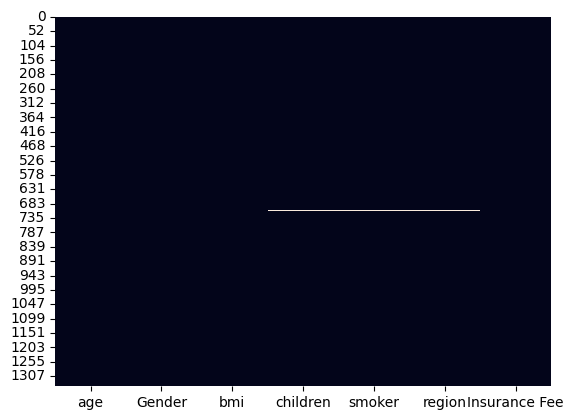

In [79]:
sns.heatmap(df.isnull(), cbar = False)

In [80]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

age              0
Gender           0
bmi              0
children         0
smoker           0
region           0
Insurance Fee    0
dtype: int64

<Axes: >

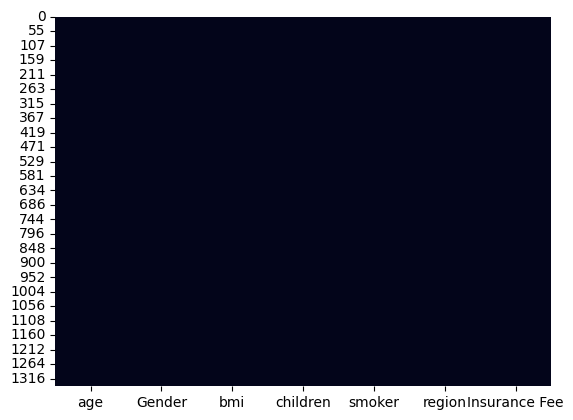

In [81]:
sns.heatmap(df.isnull(), cbar = False)

## Task 4. rename() 이용하여 열 이름 바꾸기

In [82]:
df.columns

Index(['age', 'Gender', 'bmi', 'children', 'smoker', 'region',
       'Insurance Fee'],
      dtype='object')

In [83]:
df.rename(columns={
    'Gender': 'gender',
    'Insurance Fee': 'charges'}, inplace = True)
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Task 5. replace() 이용하여 행 값 바꾸기

In [84]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19.0,female,27.90,0.0,yes,southwest,16884.9240
1,18.0,male,33.77,1.0,no,southeast,1725.5523
2,28.0,male,33.00,3.0,no,southeast,4449.4620
4,32.0,male,28.88,0.0,no,northwest,3866.8552
6,46.0,female,33.44,1.0,no,southeast,8240.5896


In [85]:
df.replace({'gender': {'female': 1}}, inplace = True)
df.replace({'gender': {'male': 0}}, inplace = True)
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19.0,1,27.90,0.0,yes,southwest,16884.9240
1,18.0,0,33.77,1.0,no,southeast,1725.5523
2,28.0,0,33.00,3.0,no,southeast,4449.4620
4,32.0,0,28.88,0.0,no,northwest,3866.8552
6,46.0,1,33.44,1.0,no,southeast,8240.5896


## Task 6. 이상 값 처리

<Axes: ylabel='age'>

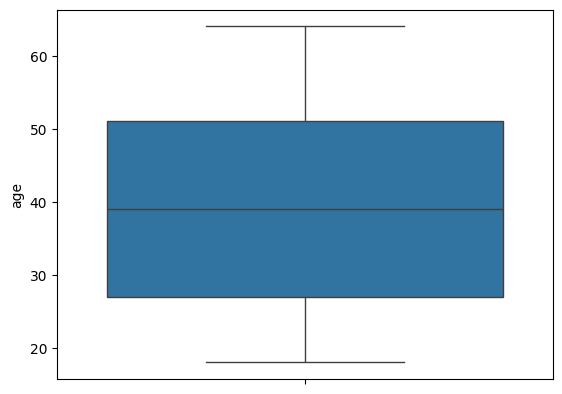

In [86]:
sns.boxplot(y = df['age']) # it hasn't outliers

<Axes: ylabel='bmi'>

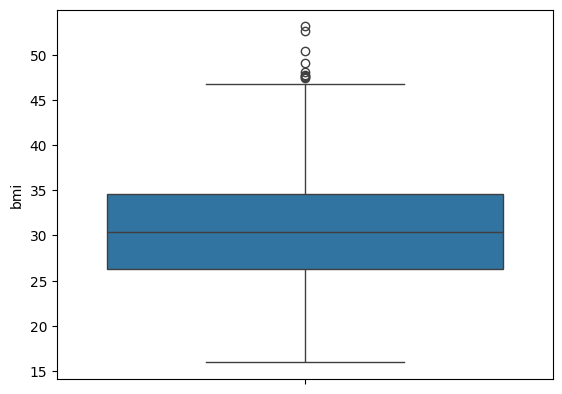

In [87]:
sns.boxplot(y = df['bmi']) # it has outliers

<Axes: ylabel='bmi'>

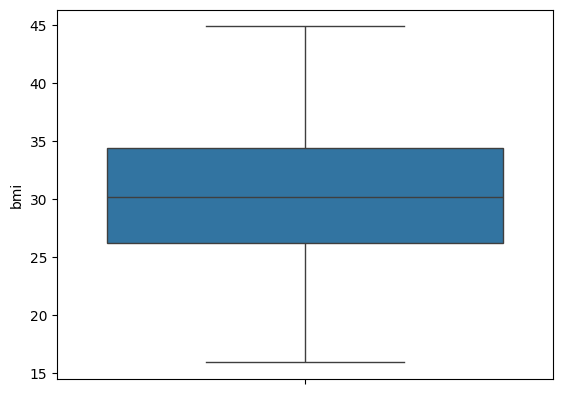

In [88]:
df.drop(df[df['bmi'] > 45].index, inplace = True)
sns.boxplot(y = df['bmi'])

<Axes: ylabel='children'>

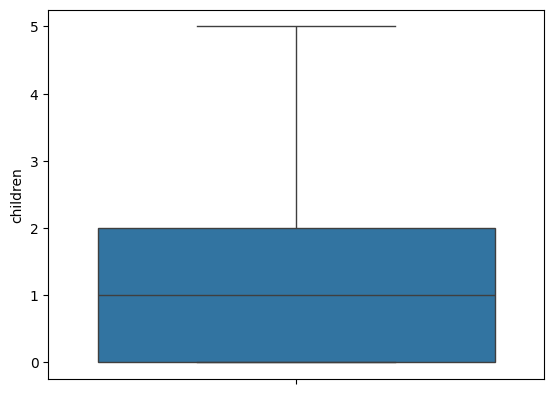

In [89]:
sns.boxplot(y = df['children']) # it hasn't outliers

<Axes: ylabel='charges'>

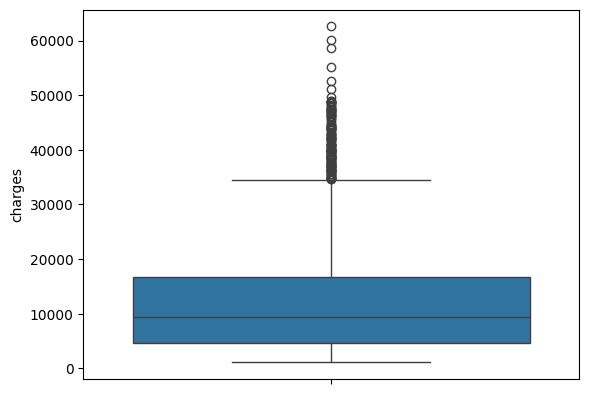

In [90]:
sns.boxplot(y = df['charges']) # it has outliers

In [91]:
df.describe()

,age,gender,bmi,children,charges
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,39.219419,0.494648,30.394060,1.094801,13233.699710
std,14.076467,0.500163,5.755346,1.207045,11992.358213
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.215000,0.000000,4746.875675
50%,39.000000,0.000000,30.210000,1.000000,9382.033000
75%,51.000000,1.000000,34.392500,2.000000,16687.364100
max,64.000000,1.000000,44.880000,5.000000,62592.873090


<Axes: ylabel='charges'>

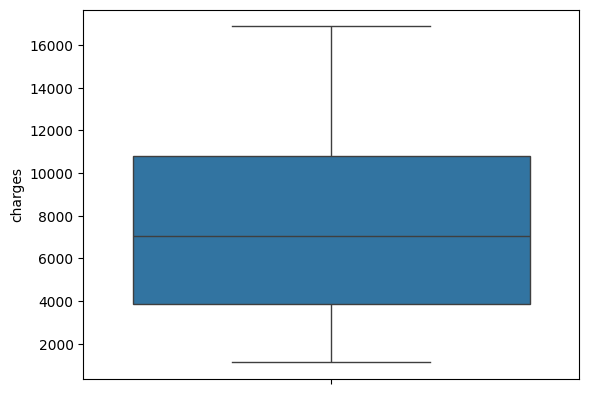

In [92]:
df.drop(df[df['charges'] > 17000].index, inplace = True)
sns.boxplot(y = df['charges']) # it has outliers

## Task 7. Min-Max 방법을 이용하여 데이터 정규화

In [93]:
df.describe()

,age,gender,bmi,children,charges
count,984.000000,984.00000,984.000000,984.000000,984.000000
mean,38.839431,0.51626,30.136453,1.063008,7366.599586
std,14.144316,0.49999,5.828166,1.217076,4091.150857
min,18.000000,0.00000,15.960000,0.000000,1121.873900
25%,26.000000,0.00000,25.885000,0.000000,3860.347050
50%,39.000000,1.00000,30.030000,1.000000,7048.371750
75%,51.000000,1.00000,34.100000,2.000000,10796.596738
max,64.000000,1.00000,44.770000,5.000000,16884.924000


In [94]:
scaler = MinMaxScaler()

df[['charges']] = scaler.fit_transform(df[['charges']])

df.describe()

,age,gender,bmi,children,charges
count,984.000000,984.00000,984.000000,984.000000,984.000000
mean,38.839431,0.51626,30.136453,1.063008,0.396162
std,14.144316,0.49999,5.828166,1.217076,0.259541
min,18.000000,0.00000,15.960000,0.000000,0.000000
25%,26.000000,0.00000,25.885000,0.000000,0.173727
50%,39.000000,1.00000,30.030000,1.000000,0.375974
75%,51.000000,1.00000,34.100000,2.000000,0.613760
max,64.000000,1.00000,44.770000,5.000000,1.000000
